## Problem Fizz Buzz Bang

### Background:

Fizz Buzz is a counting game with a set of rules for replacing certain numbers with words. 

### Note:
Conditional expressions are printed as output for each rule.

### Create R Function Library

In [1]:
#1.
create_data = function(df, n){
  for (i in n) {
    # find modulus of number for the given vector
    df = within(df, assign(paste0('V', i), df[, 1]%%i == 0))
    # find string contains the given number
    df = within(df, assign(paste0('Vg', i), grepl(i, df[, 1])))
  }
  return(df)
}

#2.
or_and_expr = function(n){
  my_expr = paste('(', 
                  paste(unlist( lapply(n, function(x) { 
                    paste('(df$V', x, ' | ', 'df$Vg', x, ')', sep  = '')
                  })),
                  collapse=" & " ),
                  ')', 
                  sep = '')
  return(my_expr)
}

#3.
myfun = function(df, n, replace){
  res_na = which(is.na(df$res))
  my_expr = or_and_expr(n = n)
  print(my_expr)
  x = which(eval(parse(text=my_expr)))
  x = intersect(res_na, x)
  df$res[x] = replace
  return(df)
}

#4.
myfun2 = function(df, yes, no, replace) {
  res_na = which(is.na(df$res))
  yes_expr = or_and_expr(n = yes)
  no_expr = paste('!', or_and_expr(n = no), sep = '')
  yes_no_expr = paste(yes_expr, no_expr, sep = " & ")
  print(yes_expr)
  print(no_expr)
  print(yes_no_expr)
  x = which(eval(parse(text=yes_no_expr)))
  x = intersect(res_na, x)
  df$res[x] = replace
  return(df)
}

### Rule 1:
The simplest version would use just 1 rule. Suppose we start with this rule: If the number is divisible by 3 or contains a digit of 3, say "Fizz" instead of the number. For example, the output should look like this:

1, 2, Fizz, 4, 5, Fizz, 7, 8, Fizz, 10, 11, Fizz, Fizz, 14, Fizz, 16, ...

Using pseudocode or a programming language of your choice, write a program to output the first 100 numbers following the rule given above.

#### data setup

In [2]:

df1 = data.frame(vec = 1:100)
df1 = create_data(df=df1, n=c(3))

#### Apply replacements

In [3]:
#---------------------------------
# 1. no matches
#---------------------------------
res = which(rowSums(df1[, -1]) == 0)
df1$res = NA
df1$res[res] = res
#---------------------------------
# 1 item.
df1 = myfun(df = df1, n = c(3), replace = 'Fizz')
#---------------------------------
# check any missing values in df1$res
stopifnot(!any(is.na(df1$res)))
#---------------------------------

[1] "((df$V3 | df$Vg3))"


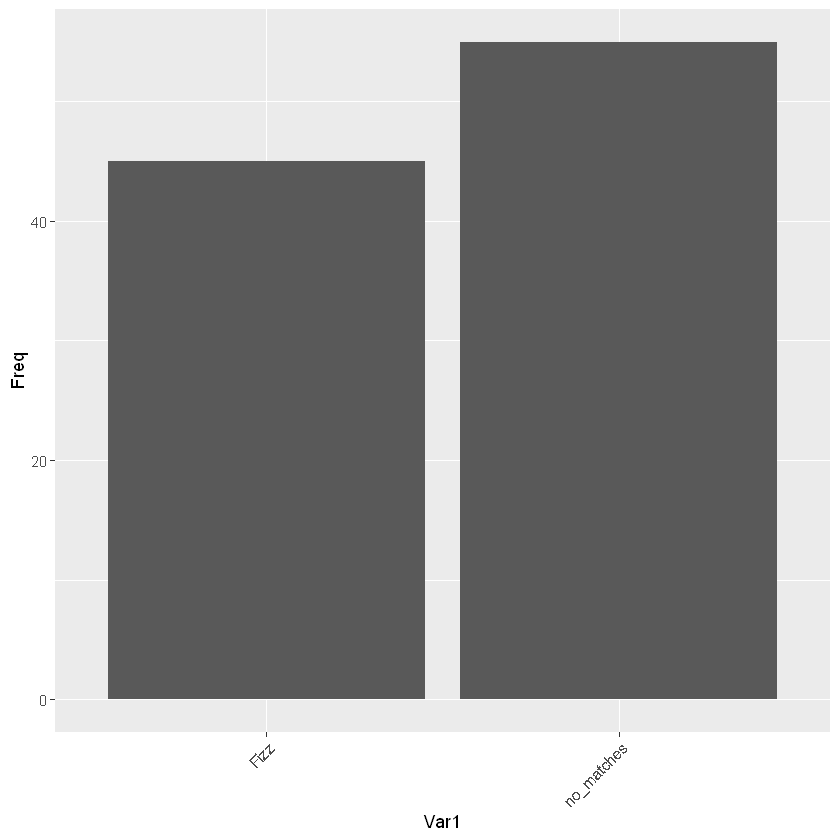

In [4]:
# Bar chart
# data setup
df2 = as.data.frame(table(df1$res[!grepl('[[:digit:]]', df1$res)]))
df2 = rbind.data.frame(df2, 
                       data.frame(Var1 = 'no_matches', Freq = sum(grepl('[[:digit:]]', df1$res)))
                       )
# plot
library(ggplot2)
ggplot(data = df2, aes(x = Var1, y = Freq)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

In [5]:
# print data
print(df1)

    vec    V3   Vg3  res
1     1 FALSE FALSE    1
2     2 FALSE FALSE    2
3     3  TRUE  TRUE Fizz
4     4 FALSE FALSE    4
5     5 FALSE FALSE    5
6     6  TRUE FALSE Fizz
7     7 FALSE FALSE    7
8     8 FALSE FALSE    8
9     9  TRUE FALSE Fizz
10   10 FALSE FALSE   10
11   11 FALSE FALSE   11
12   12  TRUE FALSE Fizz
13   13 FALSE  TRUE Fizz
14   14 FALSE FALSE   14
15   15  TRUE FALSE Fizz
16   16 FALSE FALSE   16
17   17 FALSE FALSE   17
18   18  TRUE FALSE Fizz
19   19 FALSE FALSE   19
20   20 FALSE FALSE   20
21   21  TRUE FALSE Fizz
22   22 FALSE FALSE   22
23   23 FALSE  TRUE Fizz
24   24  TRUE FALSE Fizz
25   25 FALSE FALSE   25
26   26 FALSE FALSE   26
27   27  TRUE FALSE Fizz
28   28 FALSE FALSE   28
29   29 FALSE FALSE   29
30   30  TRUE  TRUE Fizz
31   31 FALSE  TRUE Fizz
32   32 FALSE  TRUE Fizz
33   33  TRUE  TRUE Fizz
34   34 FALSE  TRUE Fizz
35   35 FALSE  TRUE Fizz
36   36  TRUE  TRUE Fizz
37   37 FALSE  TRUE Fizz
38   38 FALSE  TRUE Fizz
39   39  TRUE  TRUE Fizz


### Rule 2.

Now let's add an additional rule. If the number is divisible by 5 or contains a digit of 5, say "Buzz" instead of the number. Remember that if multiple rules apply, you must say the words associated with all rules that apply. Modify your program to follow both rules at the same time.

1, 2, Fizz, 4, Buzz, Fizz, 7, 8, Fizz, Buzz, 11, Fizz, Fizz, 14, Fizz Buzz, 16, ...

#### data setup

In [6]:

df1 = data.frame(vec = 1:100)
df1 = create_data(df=df1, n=c(3,5))

#### Apply replacements

In [7]:
# 1. no matches
#---------------------------------
res = which(rowSums(df1[, -1]) == 0)
df1$res = NA
df1$res[res] = res
#---------------------------------
#2 items
df1 = myfun(df = df1, n = c(3,5), replace = 'Fizz Buzz')
#---------------------------------
#1 item
df1 = myfun2(df = df1, yes = c(3), no = c(5), replace = 'Fizz')
df1 = myfun2(df = df1, yes = c(5), no = c(3), replace = 'Buzz')
# check any missing values in df1$res
stopifnot(!any(is.na(df1$res)))

[1] "((df$V3 | df$Vg3) & (df$V5 | df$Vg5))"
[1] "((df$V3 | df$Vg3))"
[1] "!((df$V5 | df$Vg5))"
[1] "((df$V3 | df$Vg3)) & !((df$V5 | df$Vg5))"
[1] "((df$V5 | df$Vg5))"
[1] "!((df$V3 | df$Vg3))"
[1] "((df$V5 | df$Vg5)) & !((df$V3 | df$Vg3))"


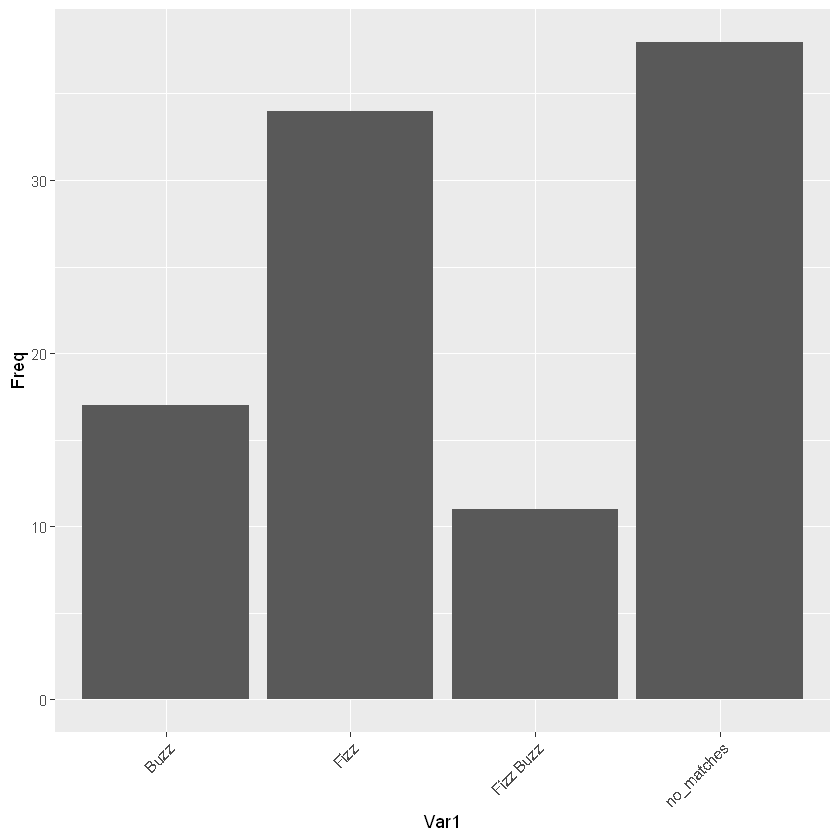

In [8]:
# Bar chart
# data setup
df3 = as.data.frame(table(df1$res[!grepl('[[:digit:]]', df1$res)]))
df3 = rbind.data.frame(df3, 
                       data.frame(Var1 = 'no_matches', Freq = sum(grepl('[[:digit:]]', df1$res)))
                       )
# plot
library(ggplot2)
ggplot(data = df3, aes(x = Var1, y = Freq)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

In [9]:
# print data
print(df1)

    vec    V3   Vg3    V5   Vg5       res
1     1 FALSE FALSE FALSE FALSE         1
2     2 FALSE FALSE FALSE FALSE         2
3     3  TRUE  TRUE FALSE FALSE      Fizz
4     4 FALSE FALSE FALSE FALSE         4
5     5 FALSE FALSE  TRUE  TRUE      Buzz
6     6  TRUE FALSE FALSE FALSE      Fizz
7     7 FALSE FALSE FALSE FALSE         7
8     8 FALSE FALSE FALSE FALSE         8
9     9  TRUE FALSE FALSE FALSE      Fizz
10   10 FALSE FALSE  TRUE FALSE      Buzz
11   11 FALSE FALSE FALSE FALSE        11
12   12  TRUE FALSE FALSE FALSE      Fizz
13   13 FALSE  TRUE FALSE FALSE      Fizz
14   14 FALSE FALSE FALSE FALSE        14
15   15  TRUE FALSE  TRUE  TRUE Fizz Buzz
16   16 FALSE FALSE FALSE FALSE        16
17   17 FALSE FALSE FALSE FALSE        17
18   18  TRUE FALSE FALSE FALSE      Fizz
19   19 FALSE FALSE FALSE FALSE        19
20   20 FALSE FALSE  TRUE FALSE      Buzz
21   21  TRUE FALSE FALSE FALSE      Fizz
22   22 FALSE FALSE FALSE FALSE        22
23   23 FALSE  TRUE FALSE FALSE   

In [10]:
#---------------------------------
# unit - testing - identifying cases - Example shown here
# only multiples of 3  
sum((1:100)%%3 == 0)  # expect: 33
# only multiples of 5
sum((1:100)%%5 == 0) - 2  # expect: 18 (total 20, but 30, 35 has string 3 - so 20-2 = 18)

[1] 33

[1] 18

### Rule 3.

Now let's add an additional new rule. If the number is divisible by 4 or has a digit of 4, instead of saying the number, say "Bang". Modify your program to follow both rules at the same time.

1, 2, Fizz, Bang, Buzz, Fizz, 7, Bang, Fizz, Buzz, 11, Fizz Bang, Fizz, Bang, Fizz Buzz, Bang, …


#### data setup

In [11]:

df1 = data.frame(vec = 1:100)
df1 = create_data(df=df1, n=c(3,4,5))

#### Apply replacements

In [12]:
# 1. no matches
#---------------------------------
res = which(rowSums(df1[, -1]) == 0)
df1$res = NA
df1$res[res] = res
#---------------------------------
# 3 items
df1 = myfun(df = df1, n = c(3,4,5), replace = 'Fizz Bang Buzz')
#---------------------------------
#2 items
df1 = myfun2(df = df1, yes = c(3,5), no = c(4), replace = 'Fizz Buzz')
df1 = myfun2(df = df1, yes = c(3,4), no = c(5), replace = 'Fizz Bang')
df1 = myfun2(df = df1, yes = c(4,5), no = c(3), replace = 'Bang Buzz')
#---------------------------------
# 1 item
df1 = myfun2(df = df1, yes = c(3), no = c(4,5), replace = 'Fizz')
df1 = myfun2(df = df1, yes = c(4), no = c(3,5), replace = 'Bang')
df1 = myfun2(df = df1, yes = c(5), no = c(3,4), replace = 'Buzz')
#---------------------------------
# check any missing values in df1$res
stopifnot(!any(is.na(df1$res)))

[1] "((df$V3 | df$Vg3) & (df$V4 | df$Vg4) & (df$V5 | df$Vg5))"
[1] "((df$V3 | df$Vg3) & (df$V5 | df$Vg5))"
[1] "!((df$V4 | df$Vg4))"
[1] "((df$V3 | df$Vg3) & (df$V5 | df$Vg5)) & !((df$V4 | df$Vg4))"
[1] "((df$V3 | df$Vg3) & (df$V4 | df$Vg4))"
[1] "!((df$V5 | df$Vg5))"
[1] "((df$V3 | df$Vg3) & (df$V4 | df$Vg4)) & !((df$V5 | df$Vg5))"
[1] "((df$V4 | df$Vg4) & (df$V5 | df$Vg5))"
[1] "!((df$V3 | df$Vg3))"
[1] "((df$V4 | df$Vg4) & (df$V5 | df$Vg5)) & !((df$V3 | df$Vg3))"
[1] "((df$V3 | df$Vg3))"
[1] "!((df$V4 | df$Vg4) & (df$V5 | df$Vg5))"
[1] "((df$V3 | df$Vg3)) & !((df$V4 | df$Vg4) & (df$V5 | df$Vg5))"
[1] "((df$V4 | df$Vg4))"
[1] "!((df$V3 | df$Vg3) & (df$V5 | df$Vg5))"
[1] "((df$V4 | df$Vg4)) & !((df$V3 | df$Vg3) & (df$V5 | df$Vg5))"
[1] "((df$V5 | df$Vg5))"
[1] "!((df$V3 | df$Vg3) & (df$V4 | df$Vg4))"
[1] "((df$V5 | df$Vg5)) & !((df$V3 | df$Vg3) & (df$V4 | df$Vg4))"


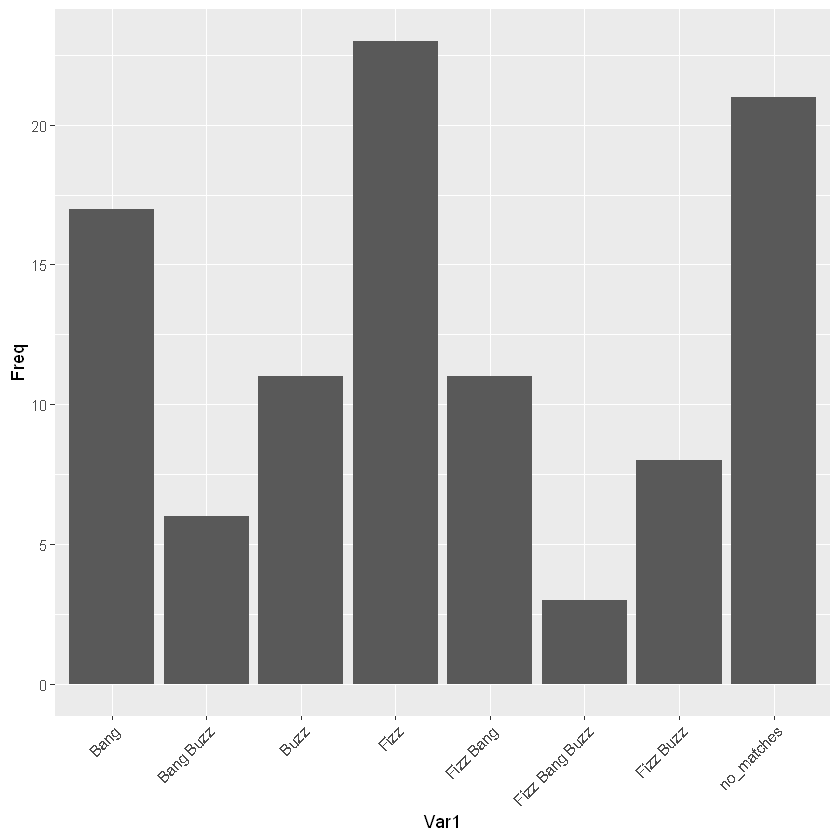

In [13]:
# Bar chart
# data setup
df4 = as.data.frame(table(df1$res[!grepl('[[:digit:]]', df1$res)]))
df4 = rbind.data.frame(df4, 
                       data.frame(Var1 = 'no_matches', Freq = sum(grepl('[[:digit:]]', df1$res)))
                       )
# plot
library(ggplot2)
ggplot(data = df4, aes(x = Var1, y = Freq)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

In [14]:
# print data
print(df1)

    vec    V3   Vg3    V4   Vg4    V5   Vg5            res
1     1 FALSE FALSE FALSE FALSE FALSE FALSE              1
2     2 FALSE FALSE FALSE FALSE FALSE FALSE              2
3     3  TRUE  TRUE FALSE FALSE FALSE FALSE           Fizz
4     4 FALSE FALSE  TRUE  TRUE FALSE FALSE           Bang
5     5 FALSE FALSE FALSE FALSE  TRUE  TRUE           Buzz
6     6  TRUE FALSE FALSE FALSE FALSE FALSE           Fizz
7     7 FALSE FALSE FALSE FALSE FALSE FALSE              7
8     8 FALSE FALSE  TRUE FALSE FALSE FALSE           Bang
9     9  TRUE FALSE FALSE FALSE FALSE FALSE           Fizz
10   10 FALSE FALSE FALSE FALSE  TRUE FALSE           Buzz
11   11 FALSE FALSE FALSE FALSE FALSE FALSE             11
12   12  TRUE FALSE  TRUE FALSE FALSE FALSE      Fizz Bang
13   13 FALSE  TRUE FALSE FALSE FALSE FALSE           Fizz
14   14 FALSE FALSE FALSE  TRUE FALSE FALSE           Bang
15   15  TRUE FALSE FALSE FALSE  TRUE  TRUE      Fizz Buzz
16   16 FALSE FALSE  TRUE FALSE FALSE FALSE           Ba

### Rule 4.
n = 3,4,5,7

#### data setup

In [15]:

df1 = data.frame(vec = 1:100)
df1 = create_data(df=df1, n=c(3,4,5,7))

In [16]:
# 1. no matches
#---------------------------------
res = which(rowSums(df1[, -1]) == 0)
df1$res = NA
df1$res[res] = res
#---------------------------------
# 4 items
df1 = myfun(df = df1, n = c(3,4,5,7), replace = 'Fizz Bang Buzz Foo')
#---------------------------------
# 3 items
df1 = myfun2(df = df1, yes = c(3,4,5), no = c(7), replace = 'Fizz Bang Buzz')
df1 = myfun2(df = df1, yes = c(3,4,7), no = c(5), replace = 'Fizz Bang Foo')
df1 = myfun2(df = df1, yes = c(4,5,7), no = c(3), replace = 'Bang Buzz Foo')
df1 = myfun2(df = df1, yes = c(3,5,7), no = c(4), replace = 'Fizz Buzz Foo')
#---------------------------------
# 2 items
df1 = myfun2(df = df1, yes = c(3,5), no = c(4,7), replace = 'Fizz Buzz')
df1 = myfun2(df = df1, yes = c(3,4), no = c(5,7), replace = 'Fizz Bang')
df1 = myfun2(df = df1, yes = c(3,7), no = c(4,5), replace = 'Fizz Foo')
df1 = myfun2(df = df1, yes = c(4,5), no = c(3,7), replace = 'Bang Buzz')
df1 = myfun2(df = df1, yes = c(4,7), no = c(3,5), replace = 'Bang Foo')
df1 = myfun2(df = df1, yes = c(5,7), no = c(3,4), replace = 'Buzz Foo')
#---------------------------------
# 1 item
df1 = myfun2(df = df1, yes = c(3), no = c(4,5,7), replace = 'Fizz')
df1 = myfun2(df = df1, yes = c(4), no = c(3,5,7), replace = 'Bang')
df1 = myfun2(df = df1, yes = c(5), no = c(3,4,7), replace = 'Buzz')
df1 = myfun2(df = df1, yes = c(7), no = c(3,4,5), replace = 'Foo')

#---------------------------------
# check any missing values in df1$res
stopifnot(!any(is.na(df1$res)))
#---------------------------------

[1] "((df$V3 | df$Vg3) & (df$V4 | df$Vg4) & (df$V5 | df$Vg5) & (df$V7 | df$Vg7))"
[1] "((df$V3 | df$Vg3) & (df$V4 | df$Vg4) & (df$V5 | df$Vg5))"
[1] "!((df$V7 | df$Vg7))"
[1] "((df$V3 | df$Vg3) & (df$V4 | df$Vg4) & (df$V5 | df$Vg5)) & !((df$V7 | df$Vg7))"
[1] "((df$V3 | df$Vg3) & (df$V4 | df$Vg4) & (df$V7 | df$Vg7))"
[1] "!((df$V5 | df$Vg5))"
[1] "((df$V3 | df$Vg3) & (df$V4 | df$Vg4) & (df$V7 | df$Vg7)) & !((df$V5 | df$Vg5))"
[1] "((df$V4 | df$Vg4) & (df$V5 | df$Vg5) & (df$V7 | df$Vg7))"
[1] "!((df$V3 | df$Vg3))"
[1] "((df$V4 | df$Vg4) & (df$V5 | df$Vg5) & (df$V7 | df$Vg7)) & !((df$V3 | df$Vg3))"
[1] "((df$V3 | df$Vg3) & (df$V5 | df$Vg5) & (df$V7 | df$Vg7))"
[1] "!((df$V4 | df$Vg4))"
[1] "((df$V3 | df$Vg3) & (df$V5 | df$Vg5) & (df$V7 | df$Vg7)) & !((df$V4 | df$Vg4))"
[1] "((df$V3 | df$Vg3) & (df$V5 | df$Vg5))"
[1] "!((df$V4 | df$Vg4) & (df$V7 | df$Vg7))"
[1] "((df$V3 | df$Vg3) & (df$V5 | df$Vg5)) & !((df$V4 | df$Vg4) & (df$V7 | df$Vg7))"
[1] "((df$V3 | df$Vg3) & (df$V4 | df$Vg4))"
[1] 

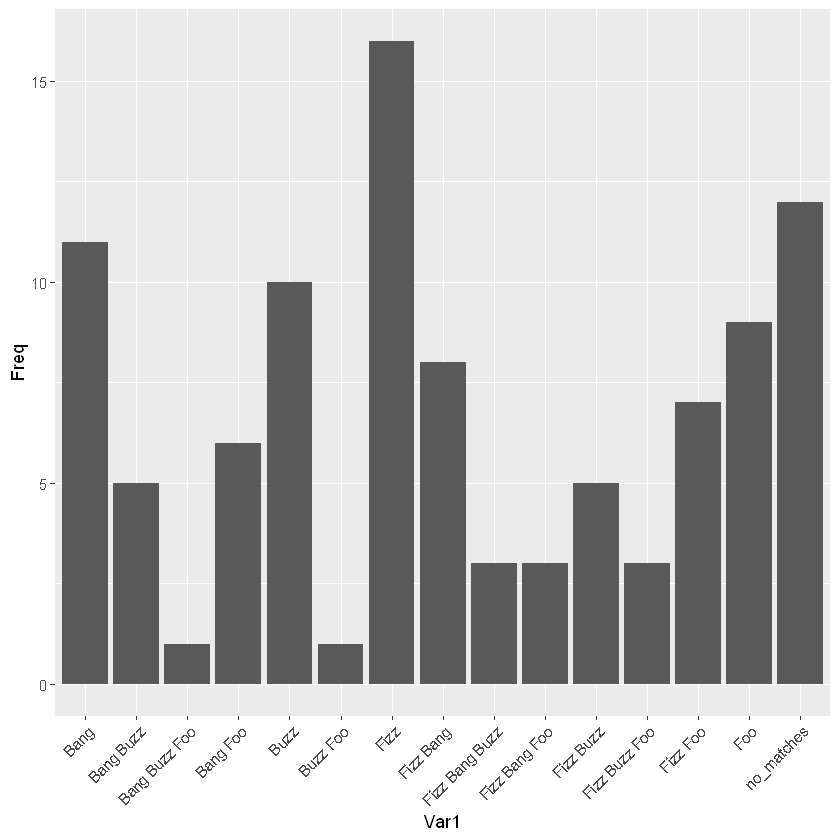

In [17]:
# Bar chart
# data setup
df5 = as.data.frame(table(df1$res[!grepl('[[:digit:]]', df1$res)]))
df5 = rbind.data.frame(df5, 
                       data.frame(Var1 = 'no_matches', Freq = sum(grepl('[[:digit:]]', df1$res)))
)
# plot
library(ggplot2)
ggplot(data = df5, aes(x = Var1, y = Freq)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

In [18]:
print(df1)

    vec    V3   Vg3    V4   Vg4    V5   Vg5    V7   Vg7            res
1     1 FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE              1
2     2 FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE              2
3     3  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE           Fizz
4     4 FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE           Bang
5     5 FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE           Buzz
6     6  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE           Fizz
7     7 FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE            Foo
8     8 FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE           Bang
9     9  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE           Fizz
10   10 FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE           Buzz
11   11 FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE             11
12   12  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE      Fizz Bang
13   13 FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE           Fizz
14   1

#### overlay all bar charts

              Var1 Freq              group
 1:           Fizz   45               Fizz
 2:     no_matches   55               Fizz
 3:           Buzz   17          Fizz Buzz
 4:           Fizz   34          Fizz Buzz
 5:      Fizz Buzz   11          Fizz Buzz
 6:     no_matches   38          Fizz Buzz
 7:           Bang   17     Fizz Bang Buzz
 8:      Bang Buzz    6     Fizz Bang Buzz
 9:           Buzz   11     Fizz Bang Buzz
10:           Fizz   23     Fizz Bang Buzz
11:      Fizz Bang   11     Fizz Bang Buzz
12: Fizz Bang Buzz    3     Fizz Bang Buzz
13:      Fizz Buzz    8     Fizz Bang Buzz
14:     no_matches   21     Fizz Bang Buzz
15:           Bang   11 Fizz Bang Buzz Foo
16:      Bang Buzz    5 Fizz Bang Buzz Foo
17:  Bang Buzz Foo    1 Fizz Bang Buzz Foo
18:       Bang Foo    6 Fizz Bang Buzz Foo
19:           Buzz   10 Fizz Bang Buzz Foo
20:       Buzz Foo    1 Fizz Bang Buzz Foo
21:           Fizz   16 Fizz Bang Buzz Foo
22:      Fizz Bang    8 Fizz Bang Buzz Foo
23: Fizz Ba

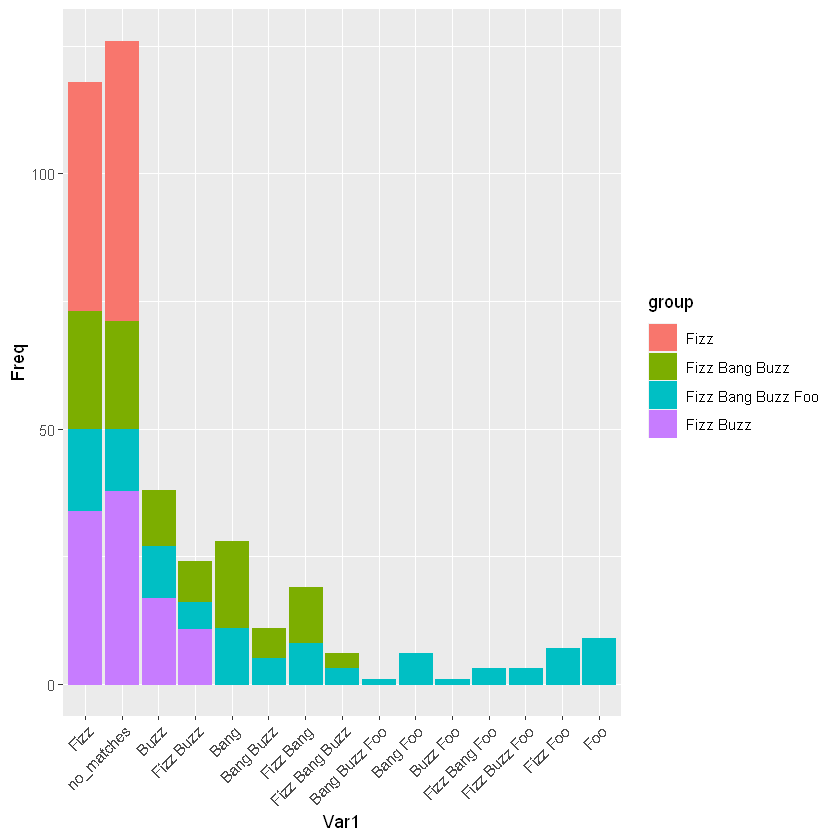

In [19]:
df2$group = 'Fizz'
df3$group = 'Fizz Buzz'
df4$group = 'Fizz Bang Buzz'
df5$group = 'Fizz Bang Buzz Foo'
library(data.table)
df6 = rbindlist(mget(c('df2', 'df3', 'df4', 'df5')), fill=TRUE)
print(df6)

# plot
library(ggplot2)
ggplot(data = df6, aes(x = Var1, y = Freq, color = group, fill = group)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))
